In [1]:
import csv
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split


c:\Users\DELL\Documents\Python\venv\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
msvcp140.dll
msvcp140_1.dll
c:\Users\DELL\Documents\Python\venv\lib\site-packages\scipy\.libs\libansari.54HGNEJBQIYZX5TZPCQGLNVIPFU6NWEX.gfortran-win_amd64.dll
c:\Users\DELL\Documents\Python\venv\lib\site-packages\scipy\.libs\libbanded5x.P5ZNKQPIS7MSMNBUOXZ4LUEJEUYBAANW.gfortran-win_amd64.dll
c:\Users\DELL\Documents\Python\venv\lib\site-packages\scipy\.libs\libbispeu.HPSBTY5F6WJ6KJ2NXCAHI76UA2TMTBUN.gfortran-win_amd64.dll
c:\Users\DELL\Documents\Python\venv\lib\site-packages\scipy\.libs\libblkdta00.MBGUWLIQ22UZOOMR5BFLQ4MSSN76MFS4.gfortran-win_amd64.dll
c:\Users\DELL\Documents\Python\venv\lib\site-packages\scipy\.libs\libchkder.CIYBJUMHB77HZDWZ7O7OQB7IFLU42V62.gfortran-win_amd64.dll
c:\Users\DELL\Documents\Python\venv\lib\site-packages\scipy\.libs\libcobyla2.RFDNNLTZGQ6OW2QDSG56I46SW3GSJA3J.gfortran-win_amd64.dll
c:\Users\DELL\Documents\Python\venv\lib\s

In [2]:
RANDOM_SEED = 42

# Specify each path

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [4]:
NUM_CLASSES = 14

# Dataset reading

In [3]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))
print(X_dataset[0])


[ 0.          0.          0.21774194  0.04032258  0.41935483 -0.07258064
  0.5483871  -0.17741935  0.6451613  -0.25        0.57258064 -0.27419356
  0.733871   -0.41129032  0.86290324 -0.5         0.9758065  -0.58064514
  0.5403226  -0.31451613  0.7177419  -0.45967743  0.86290324 -0.5483871
  1.         -0.62903225  0.48387095 -0.33870968  0.66129035 -0.47580644
  0.7983871  -0.5483871   0.92741936 -0.61290324  0.4032258  -0.3467742
  0.5564516  -0.46774194  0.66935486 -0.516129    0.7822581  -0.5645161 ]


In [6]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [9]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 20)                860       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 14)                154       
                                                                 
Total params: 1,224
Trainable params: 1,224
Non-trainable params: 0
_________________________________________________________________


In [10]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [11]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [12]:
model.fit(
    X_train,
    y_train,
    epochs=2000,
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/2000
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
66/92 [====================>.........] - ETA: 0s - loss: 2.6046 - accuracy: 0.0862    WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x00000206D513E8C8> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY

74/92 [=======================>......] - ETA: 0s - loss: 1.2397 - accuracy: 0.5671
Epoch 22: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
92/92 [==============================] - 0s 3ms/step - loss: 1.2401 - accuracy: 0.5658 - val_loss: 0.7564 - val_accuracy: 0.7623
Epoch 23/2000
84/92 [==========================>...] - ETA: 0s - loss: 1.2214 - accuracy: 0.5603
Epoch 23: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
92/92 [==============================] - 0s 4ms/step - loss: 1.2231 - accuracy: 0.5600 - val_loss: 0.7384 - val_accuracy: 0.7705
Epoch 24/2000
73/92 [======================>.......] - ETA: 0s - loss: 1.2348 - accuracy: 0.5535
Epoch 24: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
92/92 [==============================] - 0s 3ms/step - loss: 1.2367 - accuracy: 0.5549 - val_loss: 0.7424 - val_accuracy: 0.7623
Epoch 25/2000
88/92 [===========================>..] - ETA: 0s - loss: 1.2069 - accuracy: 0.5717
Epoch 25

91/92 [============================>.] - ETA: 0s - loss: 1.0743 - accuracy: 0.6185
Epoch 49: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
92/92 [==============================] - 0s 4ms/step - loss: 1.0746 - accuracy: 0.6181 - val_loss: 0.5732 - val_accuracy: 0.7992
Epoch 50/2000
68/92 [=====================>........] - ETA: 0s - loss: 1.0674 - accuracy: 0.6227
Epoch 50: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
92/92 [==============================] - 0s 3ms/step - loss: 1.0707 - accuracy: 0.6229 - val_loss: 0.5762 - val_accuracy: 0.7982
Epoch 51/2000
87/92 [===========================>..] - ETA: 0s - loss: 1.0705 - accuracy: 0.6261
Epoch 51: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
92/92 [==============================] - 0s 4ms/step - loss: 1.0698 - accuracy: 0.6267 - val_loss: 0.5773 - val_accuracy: 0.7992
Epoch 52/2000
83/92 [==========================>...] - ETA: 0s - loss: 1.0586 - accuracy: 0.6216
Epoch 52

89/92 [============================>.] - ETA: 0s - loss: 0.9785 - accuracy: 0.6482
Epoch 76: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
92/92 [==============================] - 0s 3ms/step - loss: 0.9778 - accuracy: 0.6503 - val_loss: 0.4954 - val_accuracy: 0.8248
Epoch 77/2000
74/92 [=======================>......] - ETA: 0s - loss: 1.0084 - accuracy: 0.6512
Epoch 77: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
92/92 [==============================] - 0s 3ms/step - loss: 1.0109 - accuracy: 0.6537 - val_loss: 0.5025 - val_accuracy: 0.8115
Epoch 78/2000
75/92 [=======================>......] - ETA: 0s - loss: 0.9913 - accuracy: 0.6471
Epoch 78: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
92/92 [==============================] - 0s 3ms/step - loss: 0.9936 - accuracy: 0.6403 - val_loss: 0.4973 - val_accuracy: 0.8340
Epoch 79/2000
80/92 [=========================>....] - ETA: 0s - loss: 0.9669 - accuracy: 0.6566
Epoch 79

79/92 [========================>.....] - ETA: 0s - loss: 0.9453 - accuracy: 0.6566
Epoch 103: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
92/92 [==============================] - 0s 3ms/step - loss: 0.9542 - accuracy: 0.6526 - val_loss: 0.4569 - val_accuracy: 0.8545
Epoch 104/2000
65/92 [====================>.........] - ETA: 0s - loss: 0.9570 - accuracy: 0.6639
Epoch 104: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
92/92 [==============================] - 0s 3ms/step - loss: 0.9418 - accuracy: 0.6684 - val_loss: 0.4618 - val_accuracy: 0.8494
Epoch 105/2000
67/92 [====================>.........] - ETA: 0s - loss: 0.9390 - accuracy: 0.6772
Epoch 105: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
92/92 [==============================] - 0s 2ms/step - loss: 0.9508 - accuracy: 0.6691 - val_loss: 0.4420 - val_accuracy: 0.8781
Epoch 106/2000
92/92 [==============================] - ETA: 0s - loss: 0.9629 - accuracy: 0.6506
Ep

Epoch 130/2000
73/92 [======================>.......] - ETA: 0s - loss: 0.9162 - accuracy: 0.6755
Epoch 130: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
92/92 [==============================] - 0s 3ms/step - loss: 0.9238 - accuracy: 0.6749 - val_loss: 0.4220 - val_accuracy: 0.8975
Epoch 131/2000
88/92 [===========================>..] - ETA: 0s - loss: 0.9202 - accuracy: 0.6708
Epoch 131: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
92/92 [==============================] - 0s 3ms/step - loss: 0.9154 - accuracy: 0.6732 - val_loss: 0.4238 - val_accuracy: 0.8463
Epoch 132/2000
68/92 [=====================>........] - ETA: 0s - loss: 0.9233 - accuracy: 0.6641
Epoch 132: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
92/92 [==============================] - 0s 3ms/step - loss: 0.9236 - accuracy: 0.6646 - val_loss: 0.4154 - val_accuracy: 0.8842
Epoch 133/2000
86/92 [===========================>..] - ETA: 0s - loss: 0.9185 - accu

Epoch 157/2000
88/92 [===========================>..] - ETA: 0s - loss: 0.8738 - accuracy: 0.6815
Epoch 157: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
92/92 [==============================] - 0s 4ms/step - loss: 0.8739 - accuracy: 0.6834 - val_loss: 0.3923 - val_accuracy: 0.8914
Epoch 158/2000
86/92 [===========================>..] - ETA: 0s - loss: 0.8788 - accuracy: 0.6842
Epoch 158: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
92/92 [==============================] - 0s 3ms/step - loss: 0.8841 - accuracy: 0.6810 - val_loss: 0.3991 - val_accuracy: 0.9252
Epoch 159/2000
84/92 [==========================>...] - ETA: 0s - loss: 0.8762 - accuracy: 0.6808
Epoch 159: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
92/92 [==============================] - 0s 3ms/step - loss: 0.8803 - accuracy: 0.6810 - val_loss: 0.3985 - val_accuracy: 0.8924
Epoch 160/2000
72/92 [======================>.......] - ETA: 0s - loss: 0.8622 - accu

Epoch 184/2000
78/92 [========================>.....] - ETA: 0s - loss: 0.8610 - accuracy: 0.6995
Epoch 184: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
92/92 [==============================] - 0s 3ms/step - loss: 0.8661 - accuracy: 0.6964 - val_loss: 0.3794 - val_accuracy: 0.8760
Epoch 185/2000
70/92 [=====================>........] - ETA: 0s - loss: 0.8495 - accuracy: 0.7161
Epoch 185: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
92/92 [==============================] - 0s 3ms/step - loss: 0.8469 - accuracy: 0.7104 - val_loss: 0.3840 - val_accuracy: 0.8699
Epoch 186/2000
69/92 [=====================>........] - ETA: 0s - loss: 0.8658 - accuracy: 0.7056
Epoch 186: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
92/92 [==============================] - 0s 2ms/step - loss: 0.8555 - accuracy: 0.7032 - val_loss: 0.3600 - val_accuracy: 0.8975
Epoch 187/2000
51/92 [===============>..............] - ETA: 0s - loss: 0.8389 - accu

Epoch 211/2000
63/92 [===================>..........] - ETA: 0s - loss: 0.8556 - accuracy: 0.7034
Epoch 211: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
92/92 [==============================] - 0s 3ms/step - loss: 0.8382 - accuracy: 0.7084 - val_loss: 0.3560 - val_accuracy: 0.9027
Epoch 212/2000
89/92 [============================>.] - ETA: 0s - loss: 0.8231 - accuracy: 0.7054
Epoch 212: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
92/92 [==============================] - 0s 3ms/step - loss: 0.8202 - accuracy: 0.7063 - val_loss: 0.3581 - val_accuracy: 0.9057
Epoch 213/2000
64/92 [===================>..........] - ETA: 0s - loss: 0.8349 - accuracy: 0.6953
Epoch 213: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
92/92 [==============================] - 0s 2ms/step - loss: 0.8192 - accuracy: 0.7056 - val_loss: 0.3554 - val_accuracy: 0.8965
Epoch 214/2000
72/92 [======================>.......] - ETA: 0s - loss: 0.8421 - accu

Epoch 238/2000
81/92 [=========================>....] - ETA: 0s - loss: 0.7979 - accuracy: 0.7222
Epoch 238: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
92/92 [==============================] - 0s 3ms/step - loss: 0.7975 - accuracy: 0.7241 - val_loss: 0.3374 - val_accuracy: 0.9006
Epoch 239/2000
74/92 [=======================>......] - ETA: 0s - loss: 0.8167 - accuracy: 0.7057
Epoch 239: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
92/92 [==============================] - 0s 3ms/step - loss: 0.8148 - accuracy: 0.7029 - val_loss: 0.3629 - val_accuracy: 0.9314
Epoch 240/2000
70/92 [=====================>........] - ETA: 0s - loss: 0.7684 - accuracy: 0.7232
Epoch 240: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
92/92 [==============================] - 0s 4ms/step - loss: 0.7711 - accuracy: 0.7176 - val_loss: 0.3343 - val_accuracy: 0.9191
Epoch 241/2000
61/92 [==================>...........] - ETA: 0s - loss: 0.7982 - accu

Epoch 265/2000
76/92 [=======================>......] - ETA: 0s - loss: 0.7746 - accuracy: 0.7315
Epoch 265: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
92/92 [==============================] - 0s 3ms/step - loss: 0.7800 - accuracy: 0.7282 - val_loss: 0.3350 - val_accuracy: 0.9170
Epoch 266/2000
69/92 [=====================>........] - ETA: 0s - loss: 0.7661 - accuracy: 0.7301
Epoch 266: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
92/92 [==============================] - 0s 3ms/step - loss: 0.7646 - accuracy: 0.7320 - val_loss: 0.3135 - val_accuracy: 0.9252
Epoch 267/2000
78/92 [========================>.....] - ETA: 0s - loss: 0.8103 - accuracy: 0.7208
Epoch 267: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
92/92 [==============================] - 0s 3ms/step - loss: 0.8077 - accuracy: 0.7224 - val_loss: 0.3419 - val_accuracy: 0.9549
Epoch 268/2000
74/92 [=======================>......] - ETA: 0s - loss: 0.7784 - accu

In [13]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

8/8 [==============================] - 0s 2ms/step - loss: 0.3317 - accuracy: 0.9518


In [14]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [15]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1/1 [==============================] - 0s 67ms/step
[6.3532223e-03 2.9846821e-03 5.6623518e-03 4.9997419e-03 9.6430558e-01
 2.3983989e-03 1.6868683e-03 5.9080844e-06 2.7824765e-06 8.7313289e-03
 3.4024266e-05 4.2346533e-04 2.4016949e-03 1.0094502e-05]
4


# Confusion matrix

31/31 [==============================] - 0s 1ms/step


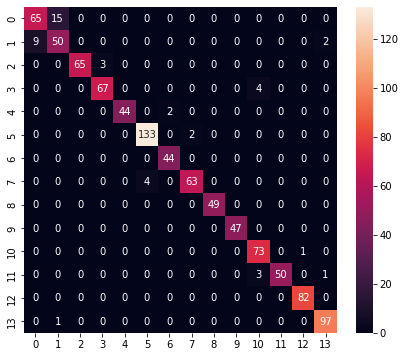

Classification Report
              precision    recall  f1-score   support

           0       0.88      0.81      0.84        80
           1       0.76      0.82      0.79        61
           2       1.00      0.96      0.98        68
           3       0.96      0.94      0.95        71
           4       1.00      0.96      0.98        46
           5       0.97      0.99      0.98       135
           6       0.96      1.00      0.98        44
           7       0.97      0.94      0.95        67
           8       1.00      1.00      1.00        49
           9       1.00      1.00      1.00        47
          10       0.91      0.99      0.95        74
          11       1.00      0.93      0.96        54
          12       0.99      1.00      0.99        82
          13       0.97      0.99      0.98        98

    accuracy                           0.95       976
   macro avg       0.95      0.95      0.95       976
weighted avg       0.95      0.95      0.95       976



In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [17]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [18]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity t

6928

# Inference test

In [19]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [20]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [21]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [22]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

Wall time: 1.18 ms


In [23]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[6.3532237e-03 2.9846844e-03 5.6623486e-03 4.9997410e-03 9.6430546e-01
 2.3983964e-03 1.6868679e-03 5.9080885e-06 2.7824790e-06 8.7313345e-03
 3.4024357e-05 4.2346603e-04 2.4016993e-03 1.0094539e-05]
4
